In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
import scipy.interpolate

pi = np.pi

to_km = 1.323e-6

ingo_r = 12.6885
ingo_m = 0.68063

p_c = 4.42e-5 # km^-2

In [3]:
def ODE(y, p, EOS_e):
    """
    Function that characterizes the ODE we are solving.
    """
    
    dy = np.zeros(y.shape)
    
    num0 = -2*y[0]*(np.sqrt(y[0])-2*y[1])
    den0 = (EOS_e(p)+p)*(y[1]+4*pi*p*y[0]**(3/2))
    
    dy[0] = num0/den0
    
    num1 = -4*np.pi*EOS_e(p)*(y[0]**(3/2))*(np.sqrt(y[0])-2*y[1])
    den1 = (EOS_e(p)+p)*(y[1]+4*pi*p*y[0]**(3/2))
    
    dy[1] = num1/den1
    
    return dy

def polytropic_epsilon(p, K=7.3, Gamma=5/3):
    e = (p/K)**(1/Gamma) + p/(Gamma-1)
    return e

The radius of the star is 12.68602601899078 km
The mass of the star is 0.6782566492846752 Mo
The difference between my answer and Ingo is -0.0024739810092189174 km
The difference between my answer and Ingo is -0.00237335071532474 Mo


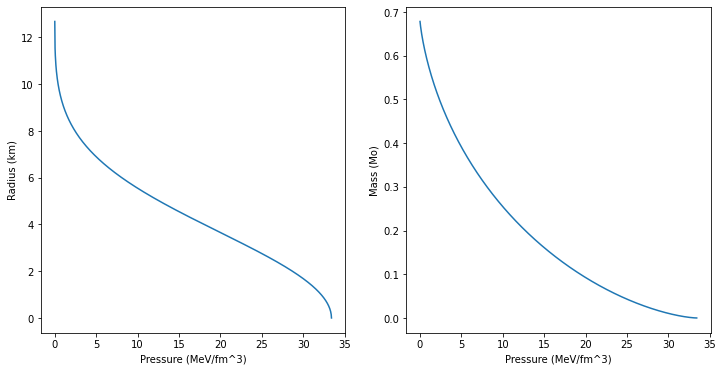

In [4]:
t0 = p_c
y0 = np.array([1e-10,1e-10])
tf = 1e-10*t0

size = int(1e3)
t = np.linspace(t0, tf, size)

sol = scipy.integrate.odeint(ODE, y0, t, args=(polytropic_epsilon,))

radius_km = np.sqrt(sol[:,0])
mass_Mo = sol[:,1]/1.4766

fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].plot(t/to_km, radius_km)
ax[0].set_xlabel('Pressure (MeV/fm^3)')
ax[0].set_ylabel('Radius (km)')

ax[1].plot(t/to_km, mass_Mo)
ax[1].set_xlabel('Pressure (MeV/fm^3)')
ax[1].set_ylabel('Mass (Mo)')

print( 'The radius of the star is ' + str(max(radius_km)) + ' km' )
print( 'The mass of the star is ' + str(max(mass_Mo)) + ' Mo' )
print( 'The difference between my answer and Ingo is ' + str(max(radius_km)-ingo_r) + ' km')
print( 'The difference between my answer and Ingo is ' + str(max(mass_Mo)-ingo_m) + ' Mo')

Text(0, 0.5, 'Mass (Mo)')

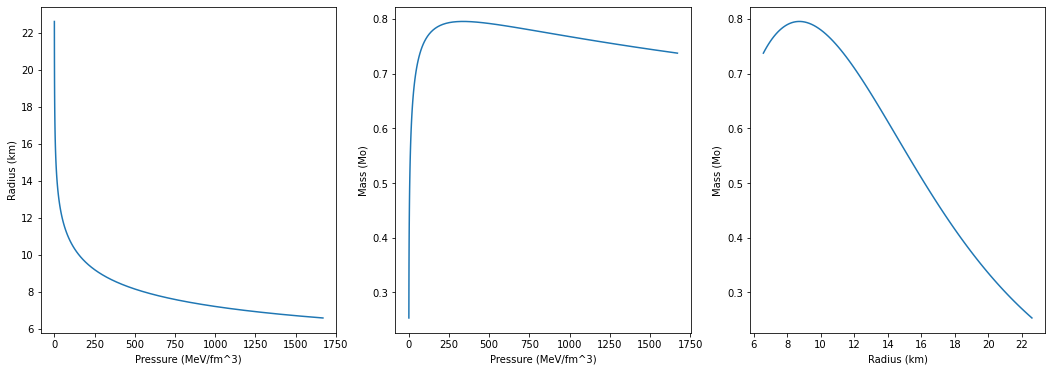

In [6]:
size = 100
start = np.log(1e-2) # start/stop for log spacing
stop = np.log(5e1)
central_ps = p_c*np.e**(np.linspace(start, stop, size)) # central pressures in km^-2

radius_km = np.zeros(size)
mass_Mo = np.zeros(size)

i = 0
for pc in central_ps:
    t0 = pc
    y0 = np.array([1e-10,1e-10])
    tf = 1e-10*t0

    size = int(1e3)
    t = np.linspace(t0, tf, size)

    sol = scipy.integrate.odeint(ODE, y0, t, args=(polytropic_epsilon,))

    radius_km[i] = max(np.sqrt(sol[:,0]))
    mass_Mo[i] = max(sol[:,1]/1.4766)
    i+=1
    
fig, ax = plt.subplots(1,3, figsize=(18,6))

ax[0].plot(central_ps/to_km, radius_km)
ax[0].set_xlabel('Pressure (MeV/fm^3)')
ax[0].set_ylabel('Radius (km)')

ax[1].plot(central_ps/to_km, mass_Mo)
ax[1].set_xlabel('Pressure (MeV/fm^3)')
ax[1].set_ylabel('Mass (Mo)')

ax[2].plot(radius_km, mass_Mo)
ax[2].set_xlabel('Radius (km)')
ax[2].set_ylabel('Mass (Mo)')

In [ ]:
# now let's try making it work with the tidal deformability

def ODE_lamb(y, p, EOS_e):
    """
    Function that characterizes the ODE we are solving.
    """
    
    dy = np.zeros(y.shape)
    
    num0 = -2*y[0]*(np.sqrt(y[0])-2*y[1])
    den0 = (EOS_e(p)+p)*(y[1]+4*pi*p*y[0]**(3/2))
    
    dy[0] = num0/den0
    
    num1 = -4*np.pi*EOS_e(p)*(y[0]**(3/2))*(np.sqrt(y[0])-2*y[1])
    den1 = (EOS_e(p)+p)*(y[1]+4*pi*p*y[0]**(3/2))
    
    dy[1] = num1/den1
    
    return dy
